In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from dbscan_pbc import DBSCAN_PBC

### 1D Example

Unique labels: [-1  0  1]
Number of clusters: 2


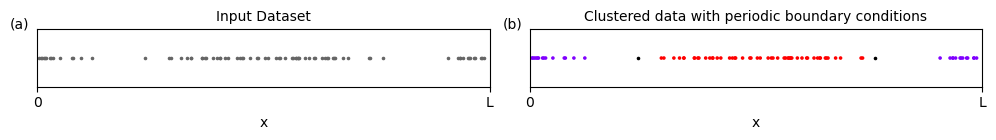

In [2]:
# Generate synthetic data
centers = [[0, 0], [1, 0], [2, 0]]  # Cluster centers
n_samples = 80  # Total number of samples
cluster_std = 0.1  # Standard deviation of the clusters
random_state = 0  # Seed for reproducibility

# Create blobs and scale the dataset
X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
X = StandardScaler().fit_transform(X)  # Standardize the data

# Apply periodic boundary conditions
L = 2.0  # Box size
X = np.mod(X, L)

# Select only the points with y > 0 and keep only the x-coordinates
X = X[X[:, 1] > 0, 0]

# Clustering parameters
eps = 0.1
min_samples = 5
db = DBSCAN_PBC(eps=eps, min_samples=min_samples).fit(X[:, np.newaxis], pbc_upper=L)

# Extract labels and number of clusters
labels = db.labels_

# Print clustering results
unique_labels = np.unique(labels)
n_clusters = len(unique_labels[unique_labels >= 0])

print(f"Unique labels: {unique_labels}")
print(f"Number of clusters: {n_clusters}")

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 1.5))

# Panel (a): Original data
axs[0].scatter(X, np.zeros_like(X), alpha=1, s=10, color=[0.4, 0.4, 0.4], marker='.')
axs[0].set_xlim(0, L)
axs[0].set_ylim(-0.05, 0.05)
axs[0].set_xticks([0, L])
axs[0].set_xlabel('x')
axs[0].set_xticklabels(['0', 'L'])
axs[0].set_yticks([])
axs[0].text(-0.06, 1.02, '(a)', transform=axs[0].transAxes, fontsize=10)
axs[0].set_title('Input Dataset', fontsize=10)
axs[0].minorticks_off()

# Panel (b): Clustered data
mask = labels >= 0
# Noise points
axs[1].scatter(X[~mask], np.zeros_like(X[~mask]), alpha=1, s=10, c='k', marker='.', label='Noise')
# Clustered points
scatter = axs[1].scatter(X[mask], np.zeros_like(X[mask]), alpha=1, s=10, c=labels[mask], cmap='rainbow', marker='.', label='Clusters')
axs[1].set_xlim(0, L)
axs[1].set_ylim(-0.05, 0.05)
axs[1].set_xticks([0, L])
axs[1].set_xlabel('x')
axs[1].set_xticklabels(['0', 'L'])
axs[1].set_yticks([])
axs[1].text(-0.06, 1.02, '(b)', transform=axs[1].transAxes, fontsize=10)
axs[1].set_title('Clustered data with periodic boundary conditions', fontsize=10)
axs[1].minorticks_off()

plt.tight_layout()
plt.show()


### 2D Example

#### 1. Generate synthetic data

In [3]:
centers = [[3.5, 1.5], [-1, -2], [1, -0.5]]  # Cluster centers
n_samples = 750  # Total number of samples
cluster_std = 0.5  # Standard deviation of clusters
random_state = 0  # Seed for reproducibility

X, labels_true = make_blobs(n_samples=n_samples, centers=centers, 
                            cluster_std=cluster_std, random_state=random_state)
X = StandardScaler().fit_transform(X)  # Standardize the dataset

# Apply periodic boundary conditions (doubly periodic in 2D)
L = 4  # Periodicity length
X = np.mod(X, L)

#### 2. Clustering with **doubly** periodic boundary conditions 

Unique labels: [-1  0  1  2]
Number of clusters: 3


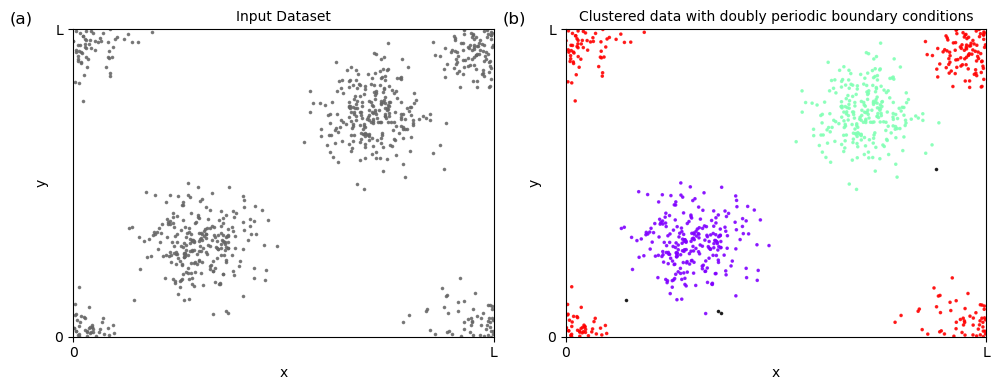

In [4]:
# Clustering parameters
eps = 0.3  # DBSCAN epsilon parameter
min_samples = 10  # Minimum samples for a core point

db = DBSCAN_PBC(eps=eps, min_samples=min_samples).fit(X, pbc_upper=L)
labels = db.labels_

# Print clustering results
unique_labels = np.unique(labels)
n_clusters = len(unique_labels[unique_labels >= 0])

print(f"Unique labels: {unique_labels}")
print(f"Number of clusters: {n_clusters}")


# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# (a) Original data
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.8, s=10, color=[0.4, 0.4, 0.4], marker='.')
axs[0].set_xlim(0, L)
axs[0].set_ylim(0, L)
axs[0].set_xticks([0, L])
axs[0].set_yticks([0, L])
axs[0].set_xticklabels(['0', 'L'])
axs[0].set_yticklabels(['0', 'L'])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].text(-0.15, 1.02, '(a)', transform=axs[0].transAxes, fontsize=12)
axs[0].set_title('Input Dataset', fontsize=10)
axs[0].minorticks_off()

# (b) Clustered data
mask = (labels >= 0)  # Mask for clustered points
axs[1].scatter(X[~mask, 0], X[~mask, 1], alpha=0.8, s=10, c='k', marker='.', label='Noise')  # Noise points
scatter = axs[1].scatter(X[mask, 0], X[mask, 1], alpha=0.8, s=10, c=labels[mask], cmap='rainbow', marker='.', label='Clusters')  # Clustered points
axs[1].set_xlim(0, L)
axs[1].set_ylim(0, L)
axs[1].set_xticks([0, L])
axs[1].set_yticks([0, L])
axs[1].set_xticklabels(['0', 'L'])
axs[1].set_yticklabels(['0', 'L'])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].text(-0.15, 1.02, '(b)', transform=axs[1].transAxes, fontsize=12)
axs[1].set_title('Clustered data with doubly periodic boundary conditions', fontsize=10)
axs[1].minorticks_off()

plt.tight_layout()
plt.show()

#### 3. Clustering with periodic boundary conditions along the x-axis

Unique labels: [-1  0  1  2  3]
Number of clusters: 4


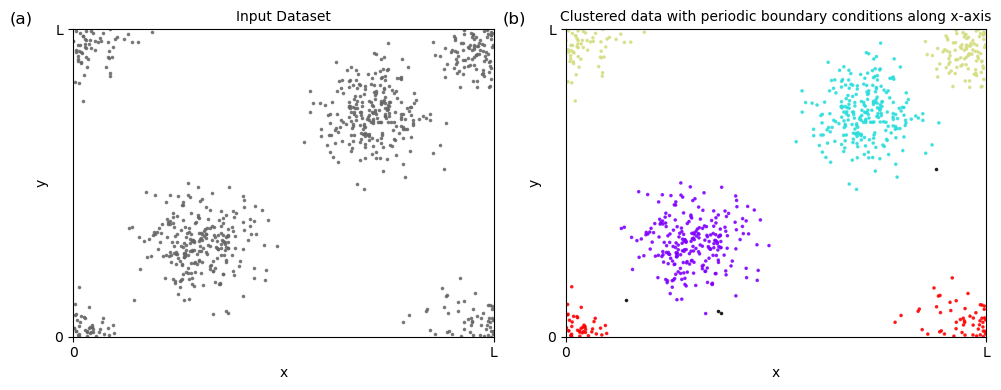

In [5]:
# Clustering parameters
eps = 0.3  # DBSCAN epsilon parameter
min_samples = 10  # Minimum samples for a core point

db = DBSCAN_PBC(eps=eps, min_samples=min_samples).fit(X, pbc_upper=(L,None))
labels = db.labels_

# Print clustering results
unique_labels = np.unique(labels)
n_clusters = len(unique_labels[unique_labels >= 0])

print(f"Unique labels: {unique_labels}")
print(f"Number of clusters: {n_clusters}")


# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# (a) Original data
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.8, s=10, color=[0.4, 0.4, 0.4], marker='.')
axs[0].set_xlim(0, L)
axs[0].set_ylim(0, L)
axs[0].set_xticks([0, L])
axs[0].set_yticks([0, L])
axs[0].set_xticklabels(['0', 'L'])
axs[0].set_yticklabels(['0', 'L'])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].text(-0.15, 1.02, '(a)', transform=axs[0].transAxes, fontsize=12)
axs[0].set_title('Input Dataset', fontsize=10)
axs[0].minorticks_off()

# (b) Clustered data
mask = (labels >= 0)  # Mask for clustered points
axs[1].scatter(X[~mask, 0], X[~mask, 1], alpha=0.8, s=10, c='k', marker='.', label='Noise')  # Noise points
scatter = axs[1].scatter(X[mask, 0], X[mask, 1], alpha=0.8, s=10, c=labels[mask], cmap='rainbow', marker='.', label='Clusters')  # Clustered points
axs[1].set_xlim(0, L)
axs[1].set_ylim(0, L)
axs[1].set_xticks([0, L])
axs[1].set_yticks([0, L])
axs[1].set_xticklabels(['0', 'L'])
axs[1].set_yticklabels(['0', 'L'])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].text(-0.15, 1.02, '(b)', transform=axs[1].transAxes, fontsize=12)
axs[1].set_title('Clustered data with periodic boundary conditions along x-axis', fontsize=10)
axs[1].minorticks_off()

plt.tight_layout()
plt.show()

### 3D Example

Unique labels: [-1  0  1  2]
Number of clusters: 3


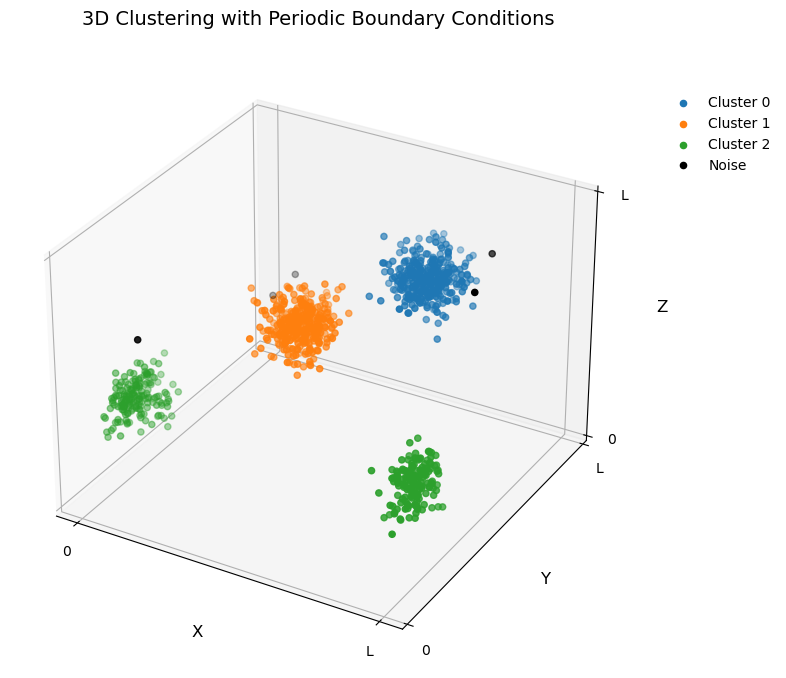

In [6]:
# Generate synthetic data
centers = [[0, 2, 3], [2, 7, 3], [6, 7, 6]]  # Cluster centers
n_samples = 1000  # Total number of samples
cluster_std = 0.5  # Standard deviation of clusters
random_state = 42  # Seed for reproducibility

X, labels_true = make_blobs(n_samples=n_samples, centers=centers, 
                            cluster_std=cluster_std, random_state=random_state)

# Apply periodic boundary conditions
L = 9  # Box size
X = np.mod(X, L)



# Activate interactive 3D plotting
# %matplotlib ipympl

# DBSCAN with periodic boundary conditions
eps = 0.75
min_samples = 10

# Perform clustering
db = DBSCAN_PBC(eps=eps, min_samples=min_samples).fit(X, pbc_upper=(L, L, L))
labels = db.labels_

# Print clustering results
unique_labels = np.unique(labels)
n_clusters = len(unique_labels[unique_labels >= 0])

print(f"Unique labels: {unique_labels}")
print(f"Number of clusters: {n_clusters}")

# 3D Visualization of clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color mapping for clusters
colors = plt.cm.tab10(np.linspace(0, 1, max(len(unique_labels), 10)))

for label in set(labels):
    # Set color: black for noise, otherwise use cluster-specific color
    color = colors[label % len(colors)] if label != -1 else 'black'  # Black for noise
    # Plot points for each cluster
    ax.scatter(*X[labels == label].T, color=color, label=f'Cluster {label}' if label != -1 else 'Noise')

ax.set_title('3D Clustering with Periodic Boundary Conditions', fontsize=14, pad=20)

ax.set_xticks([0, L])
ax.set_yticks([0, L])
ax.set_zticks([0, L])
ax.set_xticklabels(['0', 'L'])
ax.set_yticklabels(['0', 'L'])
ax.set_zticklabels(['0', 'L'])

ax.set_xlabel('X', fontsize=12, labelpad=10)
ax.set_ylabel('Y', fontsize=12, labelpad=10)
ax.set_zlabel('Z', fontsize=12, labelpad=10)
ax.legend(fontsize=10, title_fontsize=11, loc='upper left', bbox_to_anchor=(1.05, 0.95), frameon=False)

plt.show()